# CAPSTONE PROJECT
## BASED RECOMENDER SYSTEM WITH KNN

**User-based** collaborative filtering:


$$\hat{r}*{ui} = \frac{
\sum\limits*{v \in N^k_i(u)} \text{similarity}(u, v) \cdot r\_{vi}}
{\sum\limits\_{v \in N^k_i(u)} \text{similarity}(u, v)}$$


**Item-based** collaborative filtering:


$$\hat{r}*{ui} = \frac{
\sum\limits*{j \in N^k_u(i)} \text{similarity}(i, j) \cdot r\_{uj}}
{\sum\limits\_{j \in N^k_u(i)} \text{similarity}(i, j)}$$


In [1]:
import numpy as np
import math

In [2]:
# Excample similarity
knn_sims = np.array([0.8, 0.92, 0.75, 0.83])
knn_sims

array([0.8 , 0.92, 0.75, 0.83])

In [3]:
# 2.0 means audit and 3.0 means complete the course
knn_ratings = np.array([3.0, 3.0, 2.0, 3.0]) 
knn_ratings

array([3., 3., 2., 3.])

predicted rating of `user6`

In [4]:
r_u6_ml =  np.dot(knn_sims, knn_ratings)/ sum(knn_sims)
print('Ratting:', r_u6_ml)

Ratting: 2.7727272727272725


In [5]:
true_rating = 3.0
rmse = math.sqrt(true_rating - r_u6_ml) ** 2
print('RMSE:', rmse)

RMSE: 0.22727272727272751


In [1]:
import pandas as pd
import seaborn as sns

In [2]:
rating_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"
rating_df = pd.read_csv(rating_url)
rating_df

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0
...,...,...,...
233301,1540125,DS0101EN,3.0
233302,1250651,PY0101EN,3.0
233303,1003832,CB0105ENv1,3.0
233304,922065,BD0141EN,3.0


In [8]:
rating_sparse_df = rating_df.pivot(index='user', columns='item', values='rating').fillna(0).reset_index().rename_axis(index=None, columns=None)
rating_sparse_df

,user,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,...,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0101EN,TMP0105EN,TMP0106,TMP107,WA0101EN,WA0103EN
0,2,0.0,3.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,...,0.0,2.0,0.0,3.0,0.0,2.0,2.0,0.0,3.0,0.0
1,4,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,...,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0
2,5,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0
3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,2102054,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33897,2102356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33898,2102680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33899,2102983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='rating', ylabel='Count'>

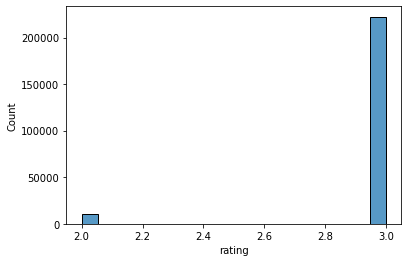

In [4]:
sns.histplot(rating_df['rating'])

<AxesSubplot:xlabel='item', ylabel='rating'>

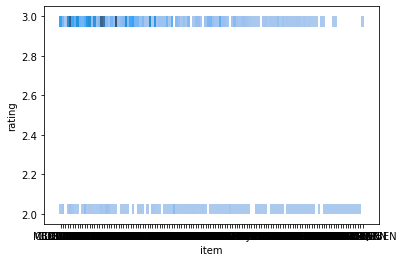

In [8]:
sns.histplot(x=rating_df['item'], y=rating_df['rating'])

In [9]:
from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
import warnings
warnings.filterwarnings('ignore')

In [10]:
data = Dataset.load_builtin('ml-100k', prompt=False)

trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous KNNBasic algorithm.
algo = KNNBasic()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [11]:
# Then compute RMSE
print('accuracy: ',accuracy.rmse(predictions))

RMSE: 0.9844
accuracy:  0.9843614948338362
